In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 24.5MB/s]
100% 163M/163M [00:08<00:00, 19.3MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

In [ ]:
!ls

## Dependencies


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image
from google.colab.patches import cv2_imshow

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print((with_mask_files[0:5]))
print((with_mask_files[-5:]))

['with_mask_445.jpg', 'with_mask_1545.jpg', 'with_mask_136.jpg', 'with_mask_407.jpg', 'with_mask_2761.jpg']
['with_mask_1152.jpg', 'with_mask_3434.jpg', 'with_mask_2525.jpg', 'with_mask_348.jpg', 'with_mask_730.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')
print((without_mask_files[0:5]))
print((without_mask_files[-5:]))

['without_mask_2124.jpg', 'without_mask_2977.jpg', 'without_mask_219.jpg', 'without_mask_3542.jpg', 'without_mask_3485.jpg']
['without_mask_3595.jpg', 'without_mask_1413.jpg', 'without_mask_2568.jpg', 'without_mask_3552.jpg', 'without_mask_210.jpg']


In [9]:
print("The number of images: ",len(with_mask_files))
print("The number of images: ",len(without_mask_files))

The number of images:  3725
The number of images:  3828


## Labellig

with mask---->1

without mask---->0

In [11]:
with_mask_labels=[1]*len(with_mask_files)
without_mask_files=[0]*len(without_mask_files)

In [12]:
print(with_mask_labels[0:5])
print(without_mask_files[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_files))

3725
3828


In [15]:
labels=with_mask_labels + without_mask_files    # combining the two list
print(len(labels))

print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Viewing images

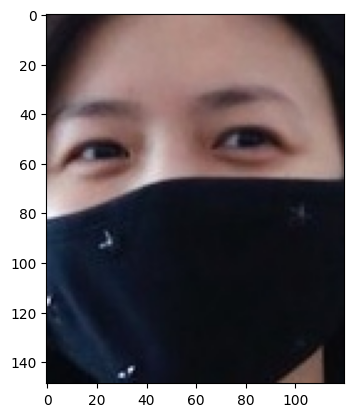

In [17]:
img=mpimg.imread('/content/data/with_mask/with_mask_445.jpg')  # reading the image as numpy array and plotting it
plt.imshow(img)
plt.show()

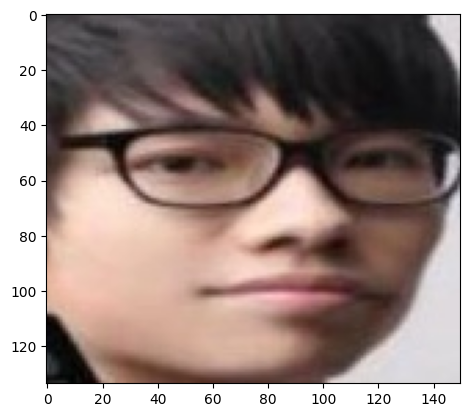

In [18]:
img1=plt.imread('/content/data/without_mask/without_mask_2124.jpg')
plt.imshow(img1)
plt.show()

## Image Processing

1.Resizing

2.convert the images to numpy arrays

In [21]:
with_mask_files=os.listdir('/content/data/with_mask')
with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)

  data.append(image)


  without_mask_files=os.listdir('/content/data/without_mask')
  without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)

  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[46, 40, 44],
        [48, 42, 46],
        [54, 45, 52],
        ...,
        [21, 21, 31],
        [21, 21, 31],
        [21, 21, 31]],

       [[47, 41, 45],
        [51, 46, 49],
        [56, 48, 55],
        ...,
        [20, 20, 30],
        [20, 20, 30],
        [20, 20, 30]],

       [[53, 47, 51],
        [53, 47, 51],
        [51, 44, 51],
        ...,
        [19, 19, 29],
        [19, 19, 29],
        [19, 19, 29]],

       ...,

       [[ 6, 10, 13],
        [ 6, 10, 13],
        [ 6, 10, 13],
        ...,
        [11, 12, 16],
        [ 8, 11, 16],
        [ 7, 10, 15]],

       [[ 6, 10, 13],
        [ 6, 10, 13],
        [ 6, 10, 13],
        ...,
        [11, 12, 16],
        [ 7, 10, 15],
        [ 7, 10, 15]],

       [[ 6, 10, 13],
        [ 6, 10, 13],
        [ 6, 10, 13],
        ...,
        [10, 11, 15],
        [ 7, 10, 15],
        [ 7, 10, 15]]], dtype=uint8)
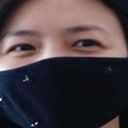

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

## converting image list and label list to numpy array

In [27]:
x=np.array(data)
y=np.array(labels)

In [28]:
type(x)

numpy.ndarray

In [29]:
type(y)

numpy.ndarray

In [30]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


## Scaling

In [37]:
x_train_scaled=x_train/255     # After scaling the model can perform better
x_test_scaled=x_test/255

array([[[245, 250, 237],
        [247, 250, 241],
        [243, 244, 242],
        ...,
        [249, 250, 250],
        [244, 239, 242],
        [248, 237, 244]],

       [[248, 252, 244],
        [244, 246, 241],
        [245, 246, 246],
        ...,
        [145, 144, 142],
        [146, 141, 138],
        [164, 156, 152]],

       [[245, 249, 245],
        [243, 244, 243],
        [245, 245, 248],
        ...,
        [115, 110, 109],
        [133, 130, 121],
        [139, 137, 124]],

       ...,

       [[246, 251, 245],
        [248, 247, 246],
        [246, 241, 246],
        ...,
        [ 33,  34,  28],
        [ 37,  39,  35],
        [ 51,  39,  42]],

       [[243, 248, 238],
        [244, 249, 245],
        [247, 249, 251],
        ...,
        [ 25,  30,  23],
        [ 39,  35,  28],
        [ 58,  41,  36]],

       [[243, 244, 238],
        [241, 244, 243],
        [239, 243, 248],
        ...,
        [ 33,  37,  37],
        [ 54,  49,  47],
        [ 67,  51,  49]]], dtype=uint8)
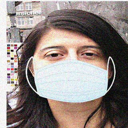

In [40]:
x_train[0]

In [39]:
x_train_scaled[0]

array([[[0.96078431, 0.98039216, 0.92941176],
        [0.96862745, 0.98039216, 0.94509804],
        [0.95294118, 0.95686275, 0.94901961],
        ...,
        [0.97647059, 0.98039216, 0.98039216],
        [0.95686275, 0.9372549 , 0.94901961],
        [0.97254902, 0.92941176, 0.95686275]],

       [[0.97254902, 0.98823529, 0.95686275],
        [0.95686275, 0.96470588, 0.94509804],
        [0.96078431, 0.96470588, 0.96470588],
        ...,
        [0.56862745, 0.56470588, 0.55686275],
        [0.57254902, 0.55294118, 0.54117647],
        [0.64313725, 0.61176471, 0.59607843]],

       [[0.96078431, 0.97647059, 0.96078431],
        [0.95294118, 0.95686275, 0.95294118],
        [0.96078431, 0.96078431, 0.97254902],
        ...,
        [0.45098039, 0.43137255, 0.42745098],
        [0.52156863, 0.50980392, 0.4745098 ],
        [0.54509804, 0.5372549 , 0.48627451]],

       ...,

       [[0.96470588, 0.98431373, 0.96078431],
        [0.97254902, 0.96862745, 0.96470588],
        [0.96470588, 0

# Building the Convolution Neural Network

In [41]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_class=2

model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class,activation='sigmoid'))

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',# numeric ecoded -- sparse categorical crossentropy
              metrics=['acc']  ## one hot -- categorical crossentropy
              )

In [47]:
# Training nn
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 12s 24ms/step - loss: 0.5649 - acc: 0.7432 - val_loss: 0.2940 - val_acc: 0.8661
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2904 - acc: 0.8854 - val_loss: 0.2567 - val_acc: 0.8694
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2459 - acc: 0.9038 - val_loss: 0.2217 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2004 - acc: 0.9237 - val_loss: 0.2208 - val_acc: 0.9058
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1772 - acc: 0.9296 - val_loss: 0.2197 - val_acc: 0.9157


In [48]:
# validation=10%

## acuracy of the model is train on 90% (acc)of data and validated with 10% (val_acc) of the data

## model evaluation

In [50]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)

48/48 [==============================] - 1s 10ms/step - loss: 0.1579 - acc: 0.9378


In [52]:
print('Test accuracy',accuracy)

Test accuracy 0.9377895593643188


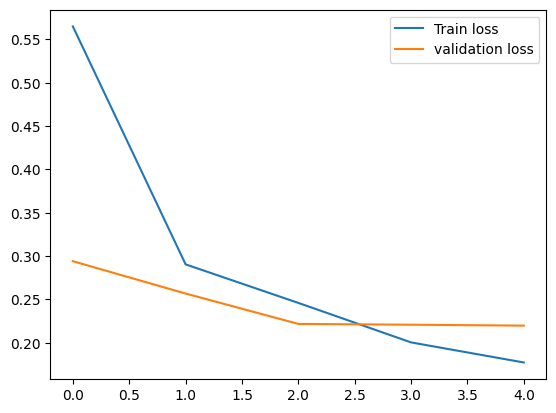

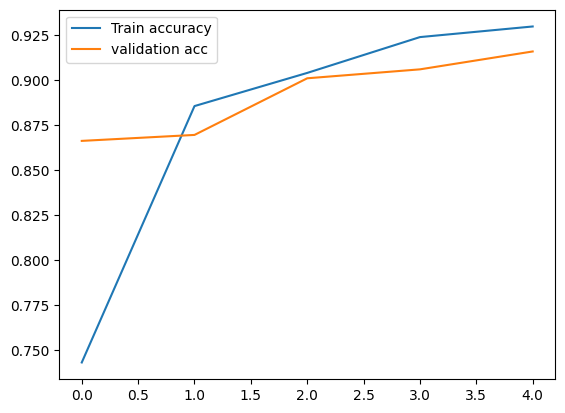

In [53]:
h=history

plt.plot(h.history['loss'],label='Train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'],label='Train accuracy')
plt.plot(h.history['val_acc'],label='validation acc')
plt.legend()
plt.show()

## Predictive system

Path of the image to be predicted: /content/test.png


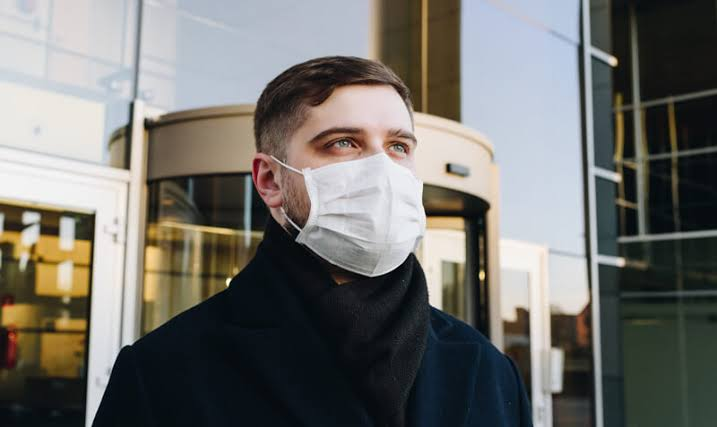

1/1 [==============================] - 0s 34ms/step
[[0.23039502 0.64610165]]
1
The person in the image is wearing a mask


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)



if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

plt.show()

Path of the image to be predicted: /content/test1.png


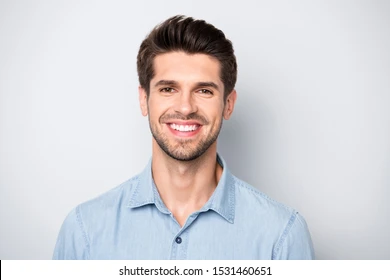

1/1 [==============================] - 0s 16ms/step
[[0.54270214 0.467793  ]]
0
The person in the image is not wearing a mask


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)



if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

plt.show()